In [1]:
import pandas as pd

df = pd.read_csv("/Users/markgranatire/Documents/flames-bdc-app/data/files/olympic_womens_dataset.csv")
df.head()
print(df.columns.tolist())

df = df.drop(["Clock", "Home Team Goals", "Away Team Goals", "X Coordinate 2", "Y Coordinate 2"], axis=1)
df['game_date'] = pd.to_datetime(df['game_date'])
df.head()

['game_date', 'Home Team', 'Away Team', 'Period', 'Clock', 'Home Team Skaters', 'Away Team Skaters', 'Home Team Goals', 'Away Team Goals', 'Team', 'Player', 'Event', 'X Coordinate', 'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4', 'Player 2', 'X Coordinate 2', 'Y Coordinate 2']


,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova
1,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Puck Recovery,91,67,NaN,NaN,NaN,NaN,NaN
2,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Dump In/Out,106,81,Retained,NaN,NaN,NaN,NaN
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva
4,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Sarah Nurse,Puck Recovery,168,1,NaN,NaN,NaN,NaN,NaN


In [2]:
df['Team'].unique()

array(['Olympic (Women) - Canada',
       'Olympic (Women) - Olympic Athletes from Russia',
       'Olympic (Women) - Finland', 'Olympic (Women) - United States',
       'St. Lawrence Saints', 'Clarkson Golden Knights'], dtype=object)

In [3]:
df = df.drop(df[df["Team"].isin(["St. Lawrence Saints", "Clarkson Golden Knights"])].index)
df['Team'].unique()

array(['Olympic (Women) - Canada',
       'Olympic (Women) - Olympic Athletes from Russia',
       'Olympic (Women) - Finland', 'Olympic (Women) - United States'],
      dtype=object)

In [4]:
df["Team"] = df["Team"].replace({
    "Olympic (Women) - Canada": "Canada",
    "Olympic (Women) - Olympic Athletes from Russia": "Russia",
    "Olympic (Women) - Finland": "Finland",
    "Olympic (Women) - United States": "USA"
})
df['Team'].unique()

array(['Canada', 'Russia', 'Finland', 'USA'], dtype=object)

In [5]:
zone_df = df[df["Event"].str.contains("Zone")]
zone_df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva
10,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Zone Entry,124,2,Carried,NaN,NaN,NaN,Meaghan Mikkelson
15,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Sarah Nurse,Zone Entry,97,3,Dumped,NaN,NaN,NaN,Angelina Goncharenko
21,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Melodie Daoust,Zone Entry,125,31,Played,NaN,NaN,NaN,Angelina Goncharenko
28,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Zone Entry,125,79,Carried,NaN,NaN,NaN,Angelina Goncharenko


In [6]:
def rink_area(x):
    if 0 <= x < 75:
        return "Defensive Zone"
    elif 75 <= x <= 125:
        return "Neutral Zone"
    else: 
        return "Offensive Zone"

In [7]:
zone_df["Zone"] = zone_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)

zone_df.head(20)

/var/folders/mn/zxv9btt5163290xr8yjc8v5h0000gn/T/ipykernel_27261/1715203218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_df["Zone"] = zone_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)


,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva,Neutral Zone
10,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Zone Entry,124,2,Carried,NaN,NaN,NaN,Meaghan Mikkelson,Neutral Zone
15,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Sarah Nurse,Zone Entry,97,3,Dumped,NaN,NaN,NaN,Angelina Goncharenko,Neutral Zone
21,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Melodie Daoust,Zone Entry,125,31,Played,NaN,NaN,NaN,Angelina Goncharenko,Neutral Zone
28,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Zone Entry,125,79,Carried,NaN,NaN,NaN,Angelina Goncharenko,Neutral Zone
34,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Zone Entry,124,70,Carried,NaN,NaN,NaN,Angelina Goncharenko,Neutral Zone
76,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Natalie Spooner,Zone Entry,125,64,Carried,NaN,NaN,NaN,Maria Batalova,Neutral Zone
94,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Rebecca Johnston,Zone Entry,124,8,Carried,NaN,NaN,NaN,Liana Ganeyeva,Neutral Zone
104,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Melodie Daoust,Zone Entry,124,80,Carried,NaN,NaN,NaN,Yekaterina Nikolayeva,Neutral Zone
110,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Zone Entry,125,31,Carried,NaN,NaN,NaN,Jocelyne Larocque,Neutral Zone


<Axes: xlabel='Date of Game', ylabel='Zone Entries Per Detail'>

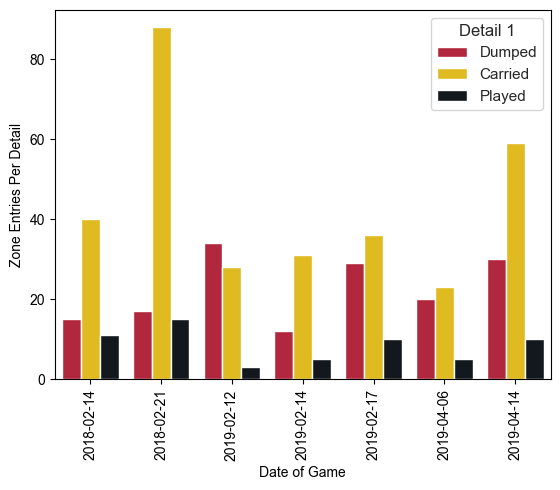

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.xlabel("Date of Game")
plt.ylabel("Zone Entries Per Detail")
flames_cat = ["#C8102E", "#FFCD00", "#101820", "#7D7D7D"]  # red, gold, black, gray, light gray
sns.set_theme(style="whitegrid")
sns.set_palette(flames_cat)

#plt.figure(figsize=(10, 8))
team_zone_df = zone_df[zone_df["Team"].str.contains("USA")]
sns.countplot(data=team_zone_df, x="game_date", hue="Detail 1")

<Axes: xlabel='Date of Game', ylabel='Zone Entries'>

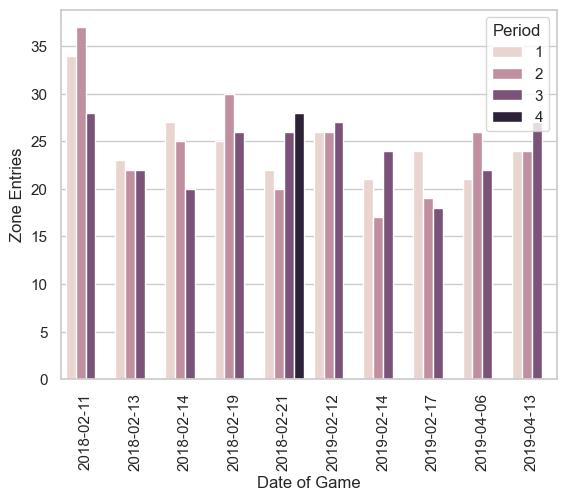

In [9]:
plt.xticks(rotation=90)
plt.xlabel("Date of Game")
plt.ylabel("Zone Entries")
flames_cat = ["#C8102E", "#FFCD00", "#101820", "#7D7D7D"]  # red, gold, black, gray, light gray
sns.set_theme(style="whitegrid")
sns.set_palette(flames_cat)

team_zone_df = zone_df[zone_df["Team"].str.contains("Canada")]
sns.countplot(data=team_zone_df, x="game_date", hue="Period")

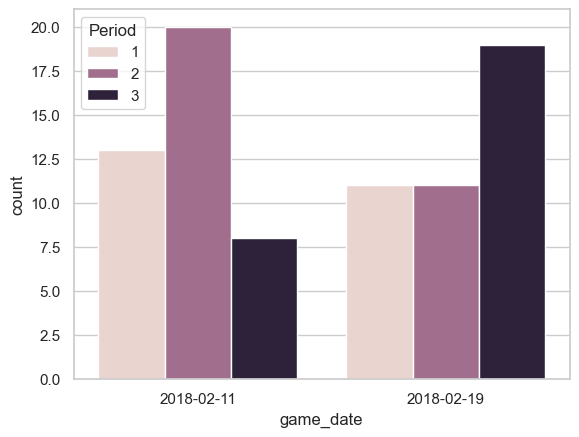

In [10]:
fig = plt.subplots()
team_zone_df = zone_df[zone_df["Team"].str.contains("Russia")]
fig = sns.countplot(data=team_zone_df, x="game_date", hue="Period")

In [11]:
team_zone_df

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
10,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Zone Entry,124,2,Carried,NaN,NaN,NaN,Meaghan Mikkelson,Neutral Zone
110,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Zone Entry,125,31,Carried,NaN,NaN,NaN,Jocelyne Larocque,Neutral Zone
147,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Anna Shokhina,Zone Entry,115,72,Dumped,NaN,NaN,NaN,Jocelyne Larocque,Neutral Zone
212,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Valeria Pavlova,Zone Entry,126,3,Carried,NaN,NaN,NaN,Renata Fast,Offensive Zone
233,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Fanuza Kadirova,Zone Entry,126,80,Carried,NaN,NaN,NaN,Lauriane Rougeau,Offensive Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,2018-02-19,Olympic (Women) - Olympic Athletes from Russia,Olympic (Women) - Canada,3,5,5,Russia,Alyona Starovoitova,Zone Entry,126,6,Carried,NaN,NaN,NaN,Renata Fast,Offensive Zone
6881,2018-02-19,Olympic (Women) - Olympic Athletes from Russia,Olympic (Women) - Canada,3,5,5,Russia,Lyudmila Belyakova,Zone Entry,126,22,Carried,NaN,NaN,NaN,Renata Fast,Offensive Zone
6891,2018-02-19,Olympic (Women) - Olympic Athletes from Russia,Olympic (Women) - Canada,3,5,5,Russia,Valeria Pavlova,Zone Entry,126,64,Played,NaN,NaN,NaN,Jocelyne Larocque,Offensive Zone
6913,2018-02-19,Olympic (Women) - Olympic Athletes from Russia,Olympic (Women) - Canada,3,5,5,Russia,Angelina Goncharenko,Zone Entry,103,18,Dumped,NaN,NaN,NaN,Lauriane Rougeau,Neutral Zone


In [12]:
team_counts_per_period_df = team_zone_df.groupby(["game_date","Team", "Period"]).size().reset_index(name="Count")

team_counts_per_period_df.head()

,game_date,Team,Period,Count
0,2018-02-11,Russia,1,13
1,2018-02-11,Russia,2,20
2,2018-02-11,Russia,3,8
3,2018-02-19,Russia,1,11
4,2018-02-19,Russia,2,11


In [13]:
import plotly.tools as tls
import plotly.express as px
from plotly.io import to_html

team_counts_per_period_df["Period"] = team_counts_per_period_df["Period"].astype("category")
fig = px.bar(team_counts_per_period_df, x="game_date", y="Count", color="Period",
             barmode="group", title="Zone Entries by Period")

chart_html = to_html(fig, include_plotlyjs="cdn", full_html=False)

fig

In [14]:
team_counts_per_detail_df = team_zone_df.groupby(["game_date","Team", "Detail 1"]).size().reset_index(name="Count")

team_counts_per_detail_df.head()

,game_date,Team,Detail 1,Count
0,2018-02-11,Russia,Carried,26
1,2018-02-11,Russia,Dumped,13
2,2018-02-11,Russia,Played,2
3,2018-02-19,Russia,Carried,24
4,2018-02-19,Russia,Dumped,13


In [15]:
#team_counts_per_detail_df["Period"] = team_counts_per_detail_df["Period"].astype("category")
fig = px.bar(team_counts_per_detail_df, x="game_date", y="Count", color="Detail 1",
             barmode="group", title="Zone Entries by Detail")

chart_html = to_html(fig, include_plotlyjs="cdn", full_html=False)

fig